In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler

In [ ]:
#Exception Handling
try:
    df_raw = pd.read_csv("/content/powerdemand_5min_2021_to_2024_with weather.csv")

except FileNotFoundError:
    print("Error: File 'powerdemand_5min_2021_to_2024_with weather.csv' not found. Please check the file path.")  # More specific error message
except Exception as e:
    print(f"An error occurred: {e}")


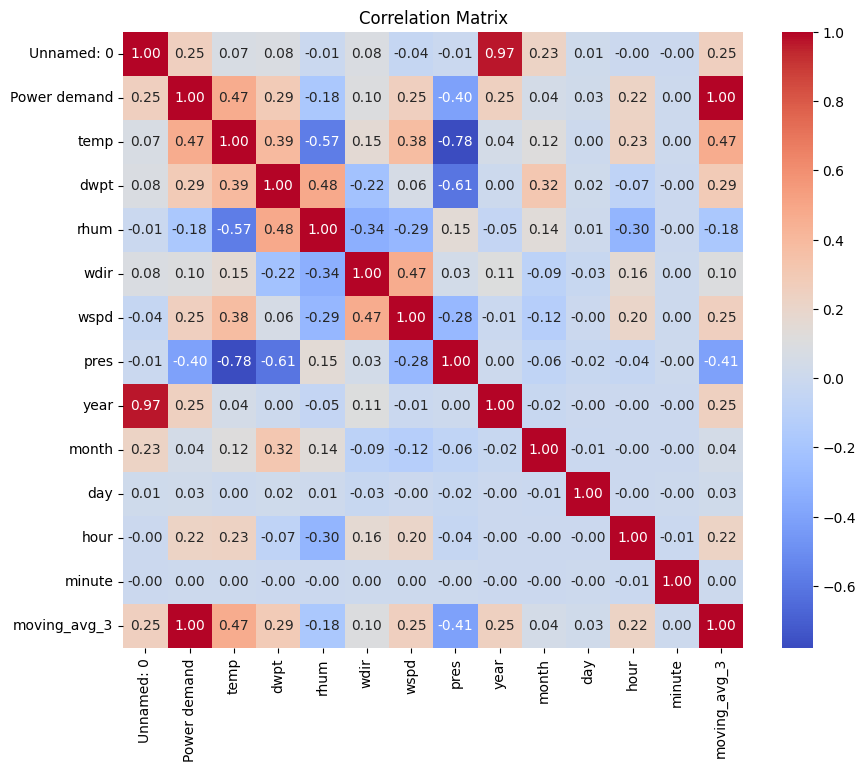

In [ ]:
# Convert 'datetime' column to datetime objects if it's not already
df_raw['datetime'] = pd.to_datetime(df_raw['datetime'])

# 3. Analyze relationships between features
# Exclude the 'datetime' column from correlation calculation
plt.figure(figsize=(10, 8))
correlation_matrix = df_raw.drop(columns=['datetime']).corr()  # Exclude 'datetime'
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Impute missing values in 'wdir' using the median, as it's less sensitive to outliers than the mean.
# The median is a good choice because wind direction might not follow a normal distribution.
df_cleaned = df_raw.copy()
df_cleaned['wdir'] = df_cleaned['wdir'].fillna(df_cleaned['wdir'].median())

# Impute missing values in 'moving_avg_3' using forward fill. Given the small number of missing values, forward fill is a reasonable approach.
df_cleaned['moving_avg_3'] = df_cleaned['moving_avg_3'].ffill()

# Outlier detection and treatment for 'Power demand'
# Winsorize the 'Power demand' column to handle outliers. This method limits extreme values to a certain percentile, preserving most of the data while mitigating the influence of outliers.
from scipy.stats.mstats import winsorize
df_cleaned['Power demand'] = winsorize(df_cleaned['Power demand'], limits=[0.01, 0.01]) # Winsorize the top and bottom 1%

# Check for and remove duplicate rows
num_duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()

# Ensure all columns have the correct data types
# 'datetime' column is already datetime64[ns]


display(df_cleaned.head())
print(df_cleaned.info())


Number of duplicate rows: 0


,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    393440 non-null  int64         
 1   datetime      393440 non-null  datetime64[ns]
 2   Power demand  393440 non-null  float64       
 3   temp          393440 non-null  float64       
 4   dwpt          393440 non-null  float64       
 5   rhum          393440 non-null  float64       
 6   wdir          393440 non-null  float64       
 7   wspd          393440 non-null  float64       
 8   pres          393440 non-null  float64       
 9   year          393440 non-null  int64         
 10  month         393440 non-null  int64         
 11  day           393440 non-null  int64         
 12  hour          393440 non-null  int64         
 13  minute        393440 non-null  int64         
 14  moving_avg_3  393438 non-null  float64       
dtypes: datetime64[ns]

In [ ]:
# Feature Engineering
df_cleaned['day_of_week'] = df_cleaned['datetime'].dt.dayofweek
df_cleaned['hour_of_day'] = df_cleaned['datetime'].dt.hour
df_cleaned['month'] = df_cleaned['datetime'].dt.month
df_cleaned['hour_sin'] = np.sin(2 * np.pi * df_cleaned['hour_of_day'] / 24)
df_cleaned['hour_cos'] = np.cos(2 * np.pi * df_cleaned['hour_of_day'] / 24)
df_cleaned['day_sin'] = np.sin(2 * np.pi * df_cleaned['day_of_week'] / 7)
df_cleaned['day_cos'] = np.cos(2 * np.pi * df_cleaned['day_of_week'] / 7)

df_cleaned


,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,...,day,hour,minute,moving_avg_3,day_of_week,hour_of_day,hour_sin,hour_cos,day_sin,day_cos
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,...,1,0,30,NaN,4,0,0.0,1.0,-0.433884,-0.900969
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,...,1,0,35,NaN,4,0,0.0,1.0,-0.433884,-0.900969
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,...,1,0,40,1999.076667,4,0,0.0,1.0,-0.433884,-0.900969
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,...,1,0,45,1986.556667,4,0,0.0,1.0,-0.433884,-0.900969
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,...,1,0,50,1969.470000,4,0,0.0,1.0,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,393435,2024-12-12 00:10:00,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,...,12,0,10,2174.893333,3,0,0.0,1.0,0.433884,-0.900969
393436,393436,2024-12-12 00:15:00,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,...,12,0,15,2139.416667,3,0,0.0,1.0,0.433884,-0.900969
393437,393437,2024-12-12 00:20:00,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,...,12,0,20,2115.423333,3,0,0.0,1.0,0.433884,-0.900969
393438,393438,2024-12-12 00:25:00,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,...,12,0,25,2086.200000,3,0,0.0,1.0,0.433884,-0.900969


In [ ]:
# prompt:  Build a Random forest regression without scaling also show y actual vs y pred in table

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define features (X) and target variable (y)
X = df_cleaned.drop(columns=['Power demand', 'datetime'])
y = df_cleaned['Power demand']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Create a DataFrame for actual vs. predicted values
comparison_df = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})
print(comparison_df)


Mean Squared Error: 2646.6771258650465
Root Mean Squared Error: 51.445865974488626
R-squared: 0.9984149780166348


NameError: name 'y_test_original' is not defined